In [25]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path

from tensorflow.keras.models import Model, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, Add, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.preprocessing.image import load_img 
import tensorflow as tf


In [26]:
path = Path(r"C:\Users\GULLYHUB\Desktop\ML & DL\utkface_aligned_cropped\crop_part1")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

print(len(filenames))
print(filenames[:3])

9780
['100_1_0_20170110183726390.jpg.chip.jpg', '100_1_2_20170105174847679.jpg.chip.jpg', '101_1_2_20170105174739309.jpg.chip.jpg']


In [27]:
np.random.seed(10)
np.random.shuffle(filenames)


age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

image_path

['31_0_3_20170104220255896.jpg.chip.jpg',
 '36_0_3_20170104235715835.jpg.chip.jpg',
 '25_1_4_20170103224747408.jpg.chip.jpg',
 '1_1_2_20161219205821918.jpg.chip.jpg',
 '13_1_0_20170109205119953.jpg.chip.jpg',
 '1_1_3_20161220145208607.jpg.chip.jpg',
 '93_1_2_20170110173119858.jpg.chip.jpg',
 '6_1_0_20170104005551551.jpg.chip.jpg',
 '24_1_4_20170103224843361.jpg.chip.jpg',
 '34_1_3_20170105002136348.jpg.chip.jpg',
 '42_0_0_20170104172830274.jpg.chip.jpg',
 '36_0_0_20170104201829601.jpg.chip.jpg',
 '5_0_3_20170104225758624.jpg.chip.jpg',
 '1_0_2_20161219204958037.jpg.chip.jpg',
 '8_0_0_20170110220129114.jpg.chip.jpg',
 '35_0_4_20170105162641195.jpg.chip.jpg',
 '49_0_0_20170104212309140.jpg.chip.jpg',
 '4_1_2_20170109192021720.jpg.chip.jpg',
 '65_0_1_20170111195930473.jpg.chip.jpg',
 '18_1_0_20170109214557098.jpg.chip.jpg',
 '2_1_0_20170109191752762.jpg.chip.jpg',
 '56_0_0_20170104211806996.jpg.chip.jpg',
 '36_0_0_20170105163417082.jpg.chip.jpg',
 '55_1_0_20170110160643438.jpg.chip.jpg',


In [28]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels
df.head()

,image,age,gender
0,31_0_3_20170104220255896.jpg.chip.jpg,31,0
1,36_0_3_20170104235715835.jpg.chip.jpg,36,0
2,25_1_4_20170103224747408.jpg.chip.jpg,25,1
3,1_1_2_20161219205821918.jpg.chip.jpg,1,1
4,13_1_0_20170109205119953.jpg.chip.jpg,13,1


In [29]:
gender_dict = {0:"Male", 1:"female"}
df = df.astype({'age':'float32', 'gender':'int32'})
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


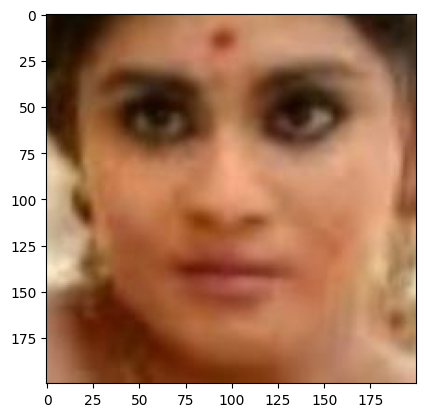

In [30]:
img = Image.open(r"C:\Users\GULLYHUB\Desktop\ML & DL\utkface_aligned_cropped\crop_part1\\" +df.image[1])
plt.imshow(img) 


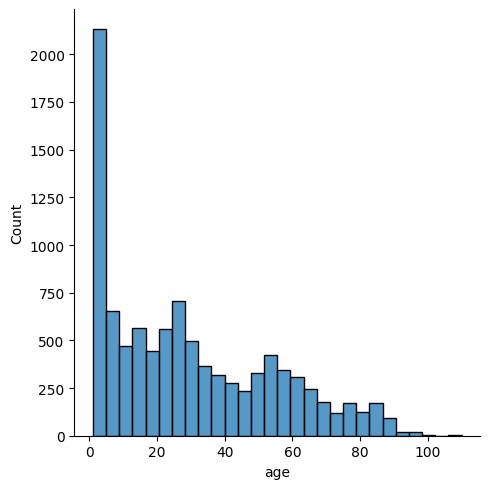

In [31]:
sns.displot(df.age)


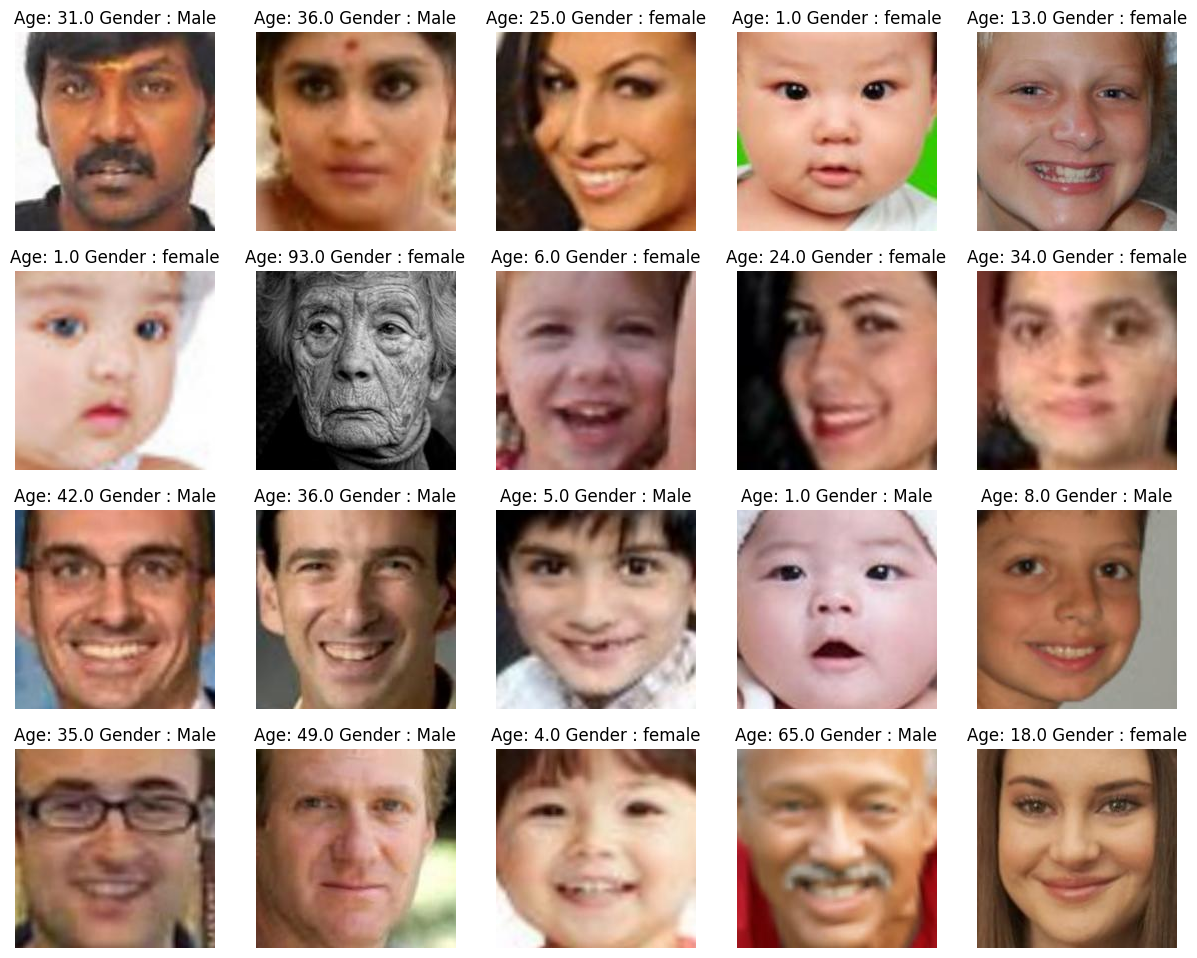

In [32]:

files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index + 1)
    img = load_img(r"C:\Users\GULLYHUB\Desktop\ML & DL\utkface_aligned_cropped\crop_part1\\" + file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender : {gender_dict[gender]}")
    plt.axis('off')

In [33]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [34]:
train.head()

,image,age,gender
634,1_1_3_20161219225238384.jpg.chip.jpg,1.0,1
6082,20_0_0_20170104230054071.jpg.chip.jpg,20.0,0
9063,4_1_3_20161219230310713.jpg.chip.jpg,4.0,1
9463,3_1_2_20161219152946212.jpg.chip.jpg,3.0,1
105,26_0_0_20170102233359482.jpg.chip.jpg,26.0,0


In [43]:
x_train = []
for file in train.image:
    img = load_img(r"C:\Users\GULLYHUB\Desktop\ML & DL\utkface_aligned_cropped\crop_part1\\" +file,  color_mode = 'grayscale')
    img = img.resize((128, 128), Image.Resampling.LANCZOS)
    img = np.array(img)
    x_train.append(img)
        
x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128, 128, 1)

        

In [44]:
 x_train.shape

(1467, 128, 128, 1)

In [45]:
x_train = x_train/255

In [57]:
y_gender = np.array(train.gender).reshape(-1, 1)
y_age = np.array(train.age).reshape(-1, 1)

In [58]:
input_size =(128, 128, 1)

In [51]:
inputs = Input((input_size))
X = Conv2D(64, (3,3), activation ='relu', kernel_initializer =glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis =3)(X)
X = MaxPooling2D((3,3))(X)


X = Conv2D(128, (3,3), activation = 'relu' )(X)
X = MaxPooling2D((2,2), strides = (2,2))(X)

X = Conv2D(256, (3,3), activation = 'relu')(X)
X = MaxPooling2D((2,2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation = 'relu')(X)
dense_2 = Dense(256, activation = 'relu')(X)
dense_3 = Dense(256, activation = 'relu')(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1, activation = 'sigmoid', name = 'gender_output' )(dropout_1)
output_2 = Dense(1, activation = 'relu', name = 'age_output' )(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])


In [59]:
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [60]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Connected to            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 128, 128, 1)     │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2d_3 (Conv2D)           │ (None, 126, 126, 64)    │            640 │ input_layer_1[0][0]     │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ batch_normalization_1       │ (None, 126, 126, 64)    │            256 │ conv2d_3[0][0]          │
│ (BatchNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ max_pooling2d_3             │ (None, 42, 42, 64)      │              0 │ batch_normalization_1[… │
│ (MaxPooling2D)              │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2d_4 (Conv2D)           │ (None, 40, 40, 128)     │         73,856 │ max_pooling2d_3[0][0]   │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ max_pooling2d_4             │ (None, 20, 20, 128)     │              0 │ conv2d_4[0][0]          │
│ (MaxPooling2D)              │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2d_5 (Conv2D)           │ (None, 18, 18, 256)     │        295,168 │ max_pooling2d_4[0][0]   │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ max_pooling2d_5             │ (None, 9, 9, 256)       │              0 │ conv2d_5[0][0]          │
│ (MaxPooling2D)              │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ flatten_1 (Flatten)         │ (None, 20736)           │              0 │ max_pooling2d_5[0][0]   │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dense_4 (Dense)             │ (None, 256)             │      5,308,672 │ flatten_1[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dense_3 (Dense)             │ (None, 256)             │      5,308,672 │ flatten_1[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dense_5 (Dense)             │ (None, 256)             │         65,792 │ dense_4[0][0]           │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dropout_2 (Dropout)         │ (None, 256)             │              0 │ dense_3[0][0]           │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dropout_3 (Dropout)         │ (None, 256)             │              0 │ dense_5[0][0]           │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ gender_output (Dense)       │ (None, 1)               │            257 │ dropout_2[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ age_output (Dense)          │ (None, 1)               │            257 │ dropout_3[0][0]         │
└─────────────────────────────┴─────────────────────────┴────────────────┴─────────────────────────┘

 Total params: 11,053,570 (42.17 MB)

 Trainable params: 11,053,442 (42.17 MB)

 Non-trainable params: 128 (512.00 B)

In [61]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20, validation_split=0.1)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - age_output_loss: 20.3485 - age_output_mae: 20.3485 - gender_output_accuracy: 0.5681 - gender_output_loss: 1.0671 - loss: 21.4156

C:\Users\GULLYHUB\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


132/132 ━━━━━━━━━━━━━━━━━━━━ 139s 966ms/step - age_output_loss: 20.3299 - age_output_mae: 20.3299 - gender_output_accuracy: 0.5683 - gender_output_loss: 1.0653 - loss: 21.3952 - val_age_output_loss: 27.3742 - val_age_output_mae: 27.4382 - val_gender_output_accuracy: 0.6463 - val_gender_output_loss: 0.6792 - val_loss: 28.1174
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - age_output_loss: 13.6678 - age_output_mae: 13.6678 - gender_output_accuracy: 0.6801 - gender_output_loss: 0.5843 - loss: 14.2521 - val_age_output_loss: 26.9399 - val_age_output_mae: 27.0097 - val_gender_output_accuracy: 0.7075 - val_gender_output_loss: 0.6635 - val_loss: 27.6725
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - age_output_loss: 11.0756 - age_output_mae: 11.0756 - gender_output_accuracy: 0.7262 - gender_output_loss: 0.5319 - loss: 11.6075 - val_age_output_loss: 20.1573 - val_age_output_mae: 20.2224 - val_gender_output_accuracy: 0.6667 - val_gender_output_loss: 0.6498 - val_loss: 20.8731
Epo

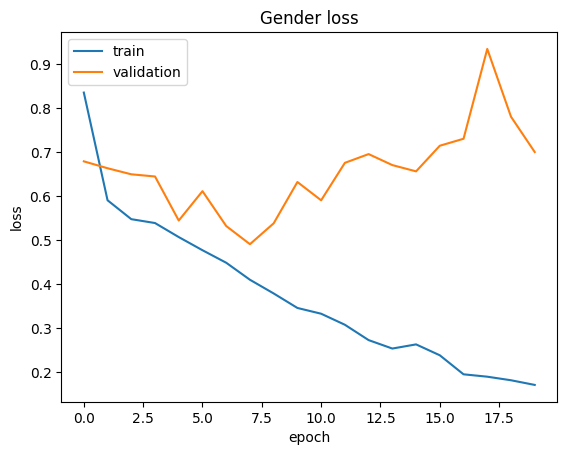

In [62]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


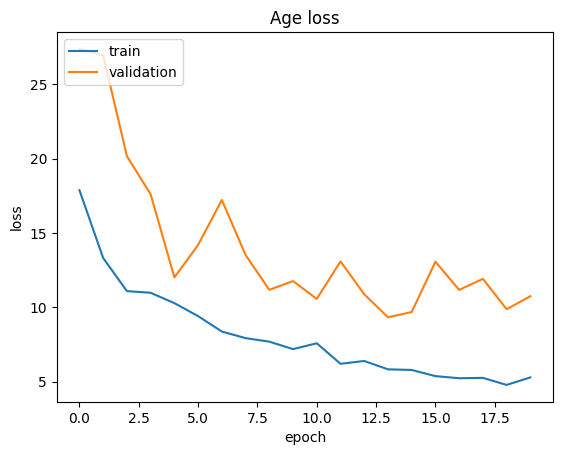

In [63]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Original: Gender = female  Age = 72.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: Gender =  female Age = 64


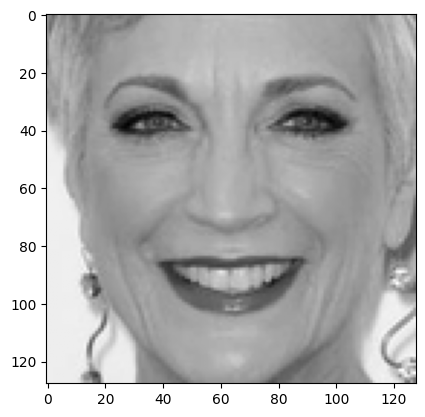

In [66]:
index=50
print("Original: Gender =", gender_dict[y_gender[index][0]], " Age =", y_age[index][0])
pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pre_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pre_gender, "Age =", pred_age)
plt.imshow(x_train[index].reshape(128, 128), cmap='gray')


Original: Gender = Male  Age = 2.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: Gender =  Male Age = 2


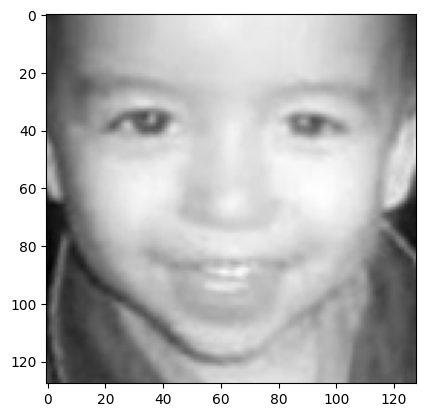

In [68]:
index=20
print("Original: Gender =", gender_dict[y_gender[index][0]], " Age =", y_age[index][0])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pre_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pre_gender, "Age =", pred_age)
plt.imshow(x_train[index].reshape(128, 128), cmap='gray')